In [3]:
import sys
import numpy as np
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [5]:
df_all_melted=pd.read_csv('../data_inhouse_fmri/data_for_fig_allsnr.csv')
df_raw_melted=pd.read_csv('../data_inhouse_fmri/data_for_fig_rawsnr.csv')
y_reliabilities = np.load('../data_inhouse_fmri/data_for_fig_reliability.npz.npy')
cv_accs = np.load('../data_inhouse_fmri/classification_for_fig.npz.npy').T

### T-test for classification accuracies. 

In [ ]:
from scipy.stats import ttest_1samp

In [50]:
print('Frontal cortex')
print('mean:'+str(np.mean(cv_accs[0,:])))
ttest_1samp(cv_accs[0,:],0.5)

Frontal cortex
mean:0.554483331946


Ttest_1sampResult(statistic=3.9495924955896009, pvalue=0.00079151170831906795)

In [51]:
print('Visual cortex')
print('mean:'+str(np.mean(cv_accs[1,:])))
ttest_1samp(cv_accs[1,:],0.5)

Visual cortex
mean:0.723885597273


Ttest_1sampResult(statistic=6.816454045217367, pvalue=1.2589703911236738e-06)

### Regression of classification difference between frontal and occipital onto fSNR, rSNR, reliabiltiy. 

- see "Supp_Figure_Classification_Accuracy_Single_Sub" for how classification accuracies are saved out. They are in numerical ordering of subject names, 1,2,3,..10,11,...22. And Frontal cortex is index=0. 

- see "Reliability_Analysis_Split_Half_More_regions" for how split half reliabilities are saved out. They are in numerical ordering of subject names, 1,2,3,..10,11,...22. And Frontal cortex is index=0. 

In [30]:
# get the fSNR for each region and sort by subject 
assert df_all_melted.subject.dtype=='int64' # so that subject is sorted by number properly and not by string
fsnr_F = df_all_melted.loc[df_all_melted['region']=='Frontal Cortex',].sort_values(by='subject')['all v fix SNR'].as_matrix()
fsnr_O = df_all_melted.loc[df_all_melted['region']=='Visual Cortex',].sort_values(by='subject')['all v fix SNR'].as_matrix()

In [78]:
# get the fSNR for each region and sort by subject 
assert df_all_melted.subject.dtype=='int64' # so that subject is sorted by number properly and not by string
Rsnr_F = df_raw_melted.loc[df_raw_melted['region']=='Frontal Cortex',].sort_values(by='subject')['raw SNR'].as_matrix()
Rsnr_O = df_raw_melted.loc[df_raw_melted['region']=='Visual Cortex',].sort_values(by='subject')['raw SNR'].as_matrix()

In [ ]:
#df_all_melted.loc[df_all_melted['region']=='Frontal Cortex',].sort_values(by='subject')['subject']#

This subject ordering does match the other lists. 

In [11]:
y_reliabilities.shape

(2, 21)

In [13]:
cv_accs.shape

(2, 21)

In [43]:
import statsmodels.api as sm
from scipy.stats import pearsonr

### Classification on fSNR

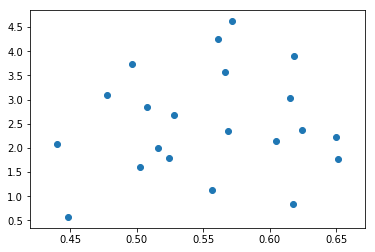

In [31]:
plt.scatter(cv_accs[0,:],fsnr_F)

In [75]:
r,p = pearsonr(cv_accs[0,:],fsnr_F)
print(r)
print(r**2)

0.110237474904
0.0121523008732


In [76]:
r,p = pearsonr(cv_accs[1,:],fsnr_O)
print(r)
print(r**2)

0.153016941032
0.0234141842428


### Classification difference on fSNR difference 

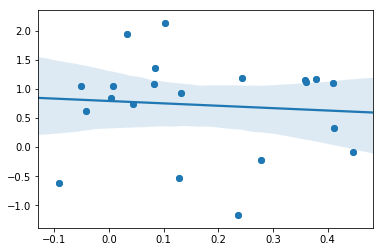

In [63]:
plt.scatter(cv_accs[1,:]-cv_accs[0,:],fsnr_O-fsnr_F)
sns.regplot(cv_accs[1,:]-cv_accs[0,:],fsnr_O-fsnr_F)

In [72]:
r,p = pearsonr(cv_accs[1,:]-cv_accs[0,:],fsnr_O-fsnr_F)
print(r)
print(r**2)

-0.0857477267793
0.00735267264782


In [64]:
results = sm.OLS(cv_accs[1,:]-cv_accs[0,:],sm.add_constant(fsnr_O-fsnr_F)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.1407
Date:                Thu, 17 May 2018   Prob (F-statistic):              0.712
Time:                        11:32:27   Log-Likelihood:                 7.5742
No. Observations:                  21   AIC:                            -11.15
Df Residuals:                      19   BIC:                            -9.059
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1824      0.052      3.514      0.002       0.074       0.291
x1            -0.0179      0.048     -0.375      0.712      -0.118       0.082
==============================================================================
Omnibus:                        4.061   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                1.507
Skew:                           0.174   Prob(JB):                        0.471
Kurtosis:                       1.735   Cond. No.                         2.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Classification on reliability 

In [70]:
r,p = pearsonr(cv_accs[0,:],y_reliabilities[0,:])
print(r)
print(r**2)

0.193970431592
0.037624528332


In [71]:
r,p = pearsonr(cv_accs[1,:],y_reliabilities[1,:])
print(r)
print(r**2)

0.332483351363
0.110545178933


### Classification difference on reliability difference 

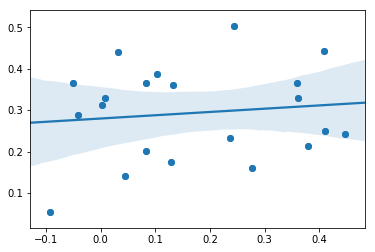

In [65]:
plt.scatter(cv_accs[1,:]-cv_accs[0,:],y_reliabilities[1,:]-y_reliabilities[0,:])
sns.regplot(cv_accs[1,:]-cv_accs[0,:],y_reliabilities[1,:]-y_reliabilities[0,:])

In [66]:
r,p = pearsonr(cv_accs[1,:]-cv_accs[0,:],y_reliabilities[1,:]-y_reliabilities[0,:])
r

0.12156591104263743

In [68]:
r**2

0.014778270727626438

In [67]:
results = sm.OLS(cv_accs[1,:]-cv_accs[0,:],sm.add_constant(y_reliabilities[1,:]-y_reliabilities[0,:])).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.2850
Date:                Thu, 17 May 2018   Prob (F-statistic):              0.600
Time:                        11:33:25   Log-Likelihood:                 7.6531
No. Observations:                  21   AIC:                            -11.31
Df Residuals:                      19   BIC:                            -9.217
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1146      0.110      1.044      0.309      -0.115       0.344
x1             0.1870      0.350      0.534      0.600      -0.546       0.920
==============================================================================
Omnibus:                        5.880   Durbin-Watson:                   2.396
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                1.857
Skew:                           0.255   Prob(JB):                        0.395
Kurtosis:                       1.635   Cond. No.                         9.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Classification on raw SNR

In [81]:
r,p = pearsonr(cv_accs[0,:],Rsnr_F)
print(r)
print(r**2)

-0.260876836174
0.068056723652


In [82]:
r,p = pearsonr(cv_accs[1,:],Rsnr_O)
print(r)
print(r**2)

0.144710430696
0.0209411087521


### Classification on all three

In [90]:
X=np.vstack((y_reliabilities[0,:],fsnr_F,Rsnr_F)).T
results = sm.OLS(cv_accs[0,:],sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.7909
Date:                Thu, 17 May 2018   Prob (F-statistic):              0.516
Time:                        11:39:28   Log-Likelihood:                 30.072
No. Observations:                  21   AIC:                            -52.14
Df Residuals:                      17   BIC:                            -47.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5968      0.092      6.506      0.000       0.403       0.790
x1             0.1464      0.167      0.879      0.392      -0.205       0.498
x2            -0.0053      0.019     -0.276      0.786      -0.046       0.035
x3            -0.0014      0.001     -1.267      0.222      -0.004       0.001
==============================================================================
Omnibus:                        1.410   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.896
Skew:                           0.065   Prob(JB):                        0.639
Kurtosis:                       1.996   Cond. No.                         889.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
X=np.vstack((y_reliabilities[1,:],fsnr_O,Rsnr_O)).T
results = sm.OLS(cv_accs[1,:],sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9816
Date:                Thu, 17 May 2018   Prob (F-statistic):              0.425
Time:                        11:39:56   Log-Likelihood:                 12.160
No. Observations:                  21   AIC:                            -16.32
Df Residuals:                      17   BIC:                            -12.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2651      0.270      0.982      0.340      -0.304       0.834
x1             0.6562      0.446      1.471      0.160      -0.285       1.597
x2            -0.0347      0.049     -0.707      0.489      -0.138       0.069
x3             0.0014      0.003      0.545      0.593      -0.004       0.007
==============================================================================
Omnibus:                        1.464   Durbin-Watson:                   2.335
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                1.030
Skew:                           0.254   Prob(JB):                        0.597
Kurtosis:                       2.041   Cond. No.                         726.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Classification difference on all three differences

In [94]:
X=np.vstack((y_reliabilities[1,:]-y_reliabilities[0,:],fsnr_O-fsnr_F,Rsnr_O-Rsnr_F)).T
results = sm.OLS(cv_accs[1,:]-cv_accs[0,:],sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                    0.4535
Date:                Thu, 17 May 2018   Prob (F-statistic):              0.718
Time:                        11:40:57   Log-Likelihood:                 8.3051
No. Observations:                  21   AIC:                            -8.610
Df Residuals:                      17   BIC:                            -4.432
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0885      0.161      0.548      0.591      -0.252       0.429
x1             0.5203      0.502      1.036      0.315      -0.539       1.580
x2            -0.0691      0.068     -1.020      0.322      -0.212       0.074
x3             0.0008      0.003      0.259      0.799      -0.006       0.008
==============================================================================
Omnibus:                        3.096   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.436
Skew:                           0.261   Prob(JB):                        0.488
Kurtosis:                       1.830   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""